In [1]:
#Importing all the important libraries
import pandas as pd
from statsmodels.tsa.api import Holt,ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import copy
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


In [2]:
def seasonal_plot(df,values,index,columns):#this function is created to do the seasonal Plot
    seasonaldata=pd.pivot_table(df, values = values, index=[index], columns = columns) #Doing Pivot table to plot seasonal data
    seasonaldata.plot(title="Seasonal Plot",figsize=(7,8),xlabel='Month',ylabel=values)
    plt.show()

In [3]:
def Seasonal_decompose(df,model):#this function is created to plot seasonal decomposed data
    result = seasonal_decompose(df,model=model) 
    result.plot()
    return "Seasonal decomposition of the data"

In [4]:
def Acf_plot(df,title):#Function to plot acf plots 
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(df,lags=90, title=title) #lags is considered as 90
    plt.xlabel("Lag")
    plt.ylabel("ACF")  
    plt.show()

In [5]:
def HotLinearSmoothing(df,months): #This function is created to implement hot linear smoothing method 
    LinearFit1 = Holt(df).fit() #Parameters are auto selected
    LinearFitcast1 = LinearFit1.forecast(months).rename("Holt's linear trend") #Forecasting for next months
    df.plot(color='blue',label='Orginal Values', legend=True)
    LinearFit1.fittedvalues.plot(label='Fitted Values',color='orange',legend=True)
    LinearFitcast1.plot(color='red',label="Forecasted Values", legend=True) #Plotting the graph
    plt.ylabel("Values")
    plt.xlabel("Time")
    plt.title('LES method-based forecasts')
    plt.show()
    MSE1=round(mean_squared_error(LinearFit1.fittedvalues, df),4) #Finding the errors of the error
    MPE=round(mean_absolute_percentage_error(LinearFit1.fittedvalues, df),4) 
    residuals1= LinearFit1.fittedvalues - df.squeeze()
    plot_acf(residuals1, title='Residual ACF for LSE model', lags=50) #finding the residuals
    plt.xlabel("LAG")
    plt.ylabel("ACF")
    #MSE2=mean_squared_error(LinearFit1.fittedvalues, df)
    return [MSE1,MPE]

In [6]:
def HotLinearLOGSmoothing(df,months): #This function is created to implement hot linear smoothing method  for lograthmic data
    LinearFit1 = Holt(df).fit()
    LinearFitcast1 = np.exp(LinearFit1.forecast(months)).rename("Holt's linear trend")
    np.exp(df).plot(color='blue',label='Orginal Values', legend=True) #doing back transformation on the data
    np.exp(LinearFit1.fittedvalues).plot(label='Fitted Values',color='orange',legend=False)
    np.exp(LinearFitcast1).plot(color='red',label="Forecasted Values", legend=True)
    plt.ylabel("Values")
    plt.xlabel("Time")
    plt.title('LES method-based forecasts')
    plt.show()
    MSE1=round(mean_squared_error(np.exp(LinearFit1.fittedvalues),np.exp(df)),4)
    MPE=round(mean_absolute_percentage_error(np.exp(LinearFit1.fittedvalues),np.exp(df)),4)
    residuals1= np.exp(LinearFit1.fittedvalues) - np.exp(df).squeeze()
    plot_acf(residuals1, title='Residual ACF for LSE model', lags=50)
    plt.xlabel("LAG")
    plt.ylabel("ACF")
    #MSE2=mean_squared_error(LinearFit1.fittedvalues, df)
    return [MSE1,MPE]

In [7]:
def HotLinearSquareSmoothing(df,months): #This function is created to implement hot linear smoothing method  for Square data
    LinearFit1 = Holt(df).fit()
    LinearFitcast1 = np.square(LinearFit1.forecast(months)).rename("Holt's linear trend")
    np.square(df).plot(color='blue',label='Orginal Values', legend=True)
    np.square(LinearFit1.fittedvalues).plot(color='orange',legend=True)
    np.square(LinearFitcast1).plot(color='orange',label="Forecasted Values", legend=True)
    plt.ylabel("Values")
    plt.xlabel("Time")
    plt.title('LES method-based forecasts')
    plt.show()
    MSE1=round(mean_squared_error(np.square(LinearFit1.fittedvalues),np.square(df)),4)
    MPE=round(mean_absolute_percentage_error(np.square(LinearFit1.fittedvalues),np.square(df)),4)
    residuals1= np.square(LinearFit1.fittedvalues) - np.square(df).squeeze()
    plot_acf(residuals1, title='Residual ACF for LSE model', lags=50)
    plt.xlabel("LAG")
    plt.ylabel("ACF")
    #MSE2=mean_squared_error(LinearFit1.fittedvalues, df)
    return [MSE1,MPE]

In [8]:
def holtwintermethods(df,months,Trend,Seasonality): #This function is created to implement hot winter smoothing method  for original data
    HoltMethod1 = ExponentialSmoothing(df, seasonal_periods=12, trend=Trend, seasonal=Seasonality).fit() #fitting values 
    df.plot(color='green',label='Orginal Values', legend=True)
    HoltMethod1.fittedvalues.plot(label='Fitted Values',color='orange',legend=True)
    HoltMethod1.forecast(months).rename('Forecast Values').plot(color='yellow', legend=True) #Forecasting for given months  and plotting it
    plt.legend()
    plt.xlabel('Dates')
    plt.ylabel('Values')
    plt.title('Model: HW-'+Trend+' Trend and '+ Seasonality+' seasonality on  data') 
    plt.show()
    #calculating errors
    MSE1=round(mean_squared_error(HoltMethod1.fittedvalues, df),5)
    MPE1=round(mean_absolute_percentage_error(HoltMethod1.fittedvalues,df),5)
    #Calculating residuals and plotting it 
    residuals1=HoltMethod1.fittedvalues - df.squeeze()
    plot_acf(residuals1, title='Residual ACF for model', lags=50)
    plt.xlabel("LAG")
    plt.ylabel("ACF")
    return [MSE1,MPE1]

In [9]:
def holtwintermethodsLograthimic(df,months,Trend,Seasonality): #This function is created to implement hot winter smoothing method  for Logaeithmic transformed data
    HoltMethod1 = ExponentialSmoothing(df, seasonal_periods=12, trend=Trend, seasonal=Seasonality).fit()
    np.exp(df).plot(color='green',label='Orginal Values', legend=True)
    np.exp(HoltMethod1.fittedvalues).plot(label='Fitted Values',color='orange',legend=True) #Doing back transformation
    np.exp(HoltMethod1.forecast(months)).rename('Forecast Values').plot(color='yellow', legend=True) #Forecasting for given months  and plotting it
    plt.legend()
    plt.xlabel('Dates')
    plt.ylabel('Values')
    plt.title('Model: HW-'+Trend+'Trend and '+ Seasonality+' seasonality on lograthimic data')
    plt.show()
    #calculating errors
    MSE1=round(mean_squared_error(np.exp(HoltMethod1.fittedvalues), np.exp(df)),5)
    MPE1=round(mean_absolute_percentage_error(np.exp(HoltMethod1.fittedvalues),np.exp(df)),5)
    #Calculating residuals and plotting it 
    residuals1= np.exp(HoltMethod1.fittedvalues) - np.exp(df).squeeze()
    plot_acf(residuals1, title='Residual ACF for model for ', lags=50)
    plt.xlabel("LAG")
    plt.ylabel("ACF")  
    return [MSE1,MPE1]

In [10]:
def holtwintermethodssquare(df,months,Trend,Seasonality): #This function is created to implement hot winter smoothing method  for Square transformed data
    HoltMethod1 = ExponentialSmoothing(df, seasonal_periods=12, trend=Trend, seasonal=Seasonality).fit()
    np.square(df).plot(color='green',label='Orginal Values', legend=True)
    np.square(HoltMethod1.fittedvalues).plot(label='Fitted Values',color='orange',legend=True)
    np.square(HoltMethod1.forecast(months)).rename('Forecast Values').plot(color='yellow', legend=True)
    plt.legend()
    plt.xlabel('Dates')
    plt.ylabel('Values')
    plt.title('Model: HW-'+Trend+'Trend and '+ Seasonality+' seasonality on lograthimic data')
    plt.show()
    MSE1=round(mean_squared_error(np.square(HoltMethod1.fittedvalues), np.square(df)),5)
    MPE1=round(mean_absolute_percentage_error(np.square(HoltMethod1.fittedvalues),np.square(df)),5)
    residuals1= np.square(HoltMethod1.fittedvalues) - np.square(df).squeeze()
    plot_acf(residuals1, title='Residual ACF for model for ', lags=50)
    plt.xlabel("LAG")
    plt.ylabel("ACF")   
    return [MSE1,MPE1]

# MSTA DATA ANALYSIS AND FORECASTING

In [11]:
MSTA=pd.read_excel('MSTA.xlsx',sheet_name='MSTA') #Reading original 
MSTAMA=pd.read_excel('MSTA.xlsx',sheet_name='MSTMA') #reading 12*2 MA data
MSTA['Time']=pd.to_datetime(MSTA['Time'])
MSTAMA['Time']=pd.to_datetime(MSTAMA['Time'])
print(MSTAMA)

          Time  Anomaly (deg C)
0   1995-01-01              NaN
1   1995-02-01              NaN
2   1995-03-01              NaN
3   1995-04-01              NaN
4   1995-05-01              NaN
..         ...              ...
319 2021-08-01              NaN
320 2021-09-01              NaN
321 2021-10-01              NaN
322 2021-11-01              NaN
323 2021-12-01              NaN

[324 rows x 2 columns]


No handles with labels found to put in legend.


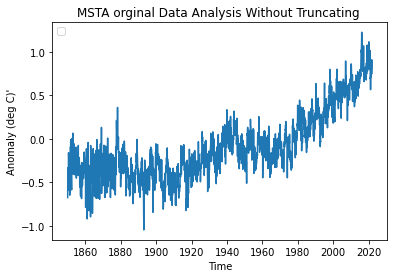

In [12]:
ax = plt.axes()
ax.plot(MSTA['Time'], MSTA['Anomaly (deg C)']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("MSTA orginal Data Analysis Without Truncating ")
plt.xlabel("Time")
plt.ylabel("Anomaly (deg C)'")
plt.show()

In [13]:
#DATA PREPARATION
MSTA=MSTA[(MSTA['Time']>='1995-01-01')]
MSTA=MSTA[['Time','Anomaly (deg C)']]

No handles with labels found to put in legend.


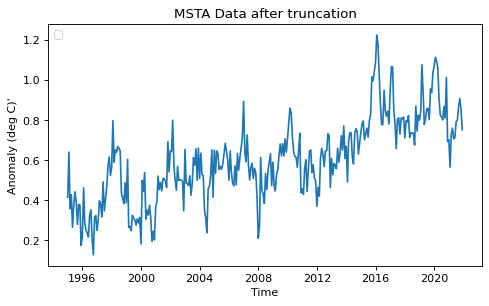

In [14]:
#doing  plot original data
ax = plt.axes()
ax.plot(MSTA['Time'], MSTA['Anomaly (deg C)']) 
plt.legend(loc="upper left")
plt.title("MSTA Data after truncation")
plt.xlabel("Time")
plt.ylabel("Anomaly (deg C)'")
plt.show()

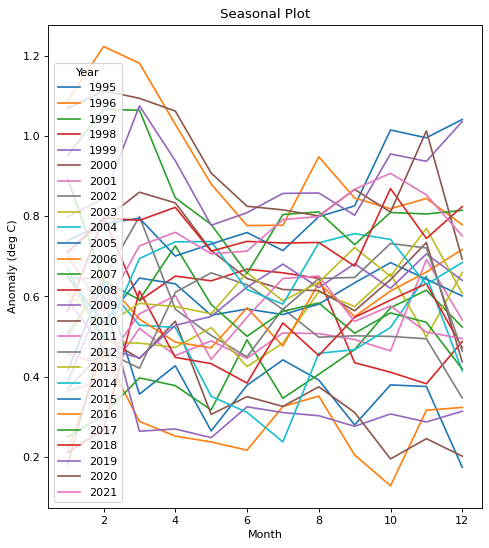

In [15]:
#seasonal plot for MSTA
MSTA['Month'] = pd.DatetimeIndex(MSTA['Time']).month
MSTA['Year'] = pd.DatetimeIndex(MSTA['Time']).year
seasonal_plot(MSTA,'Anomaly (deg C)','Month','Year')

In [16]:
#setting index for column
MSTA.set_index('Time',inplace=True) 
MSTAMA.set_index('Time',inplace=True)

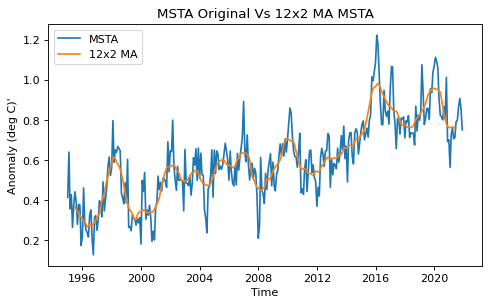

In [17]:
#Plotting 2*12 MA 
plt.plot(MSTA[['Anomaly (deg C)']],label="MSTA")
plt.plot(MSTAMA, label = "12x2 MA")
plt.title("MSTA Original Vs 12x2 MA MSTA")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Anomaly (deg C)'")
plt.show()

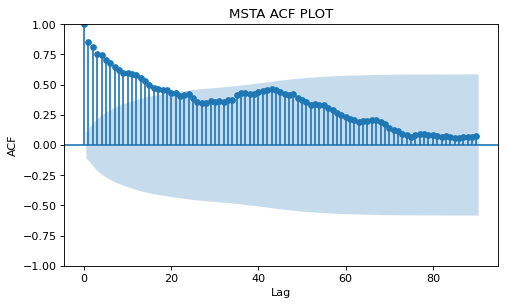

In [18]:
#Autocorrealation Function
Acf_plot(MSTA['Anomaly (deg C)'],'MSTA ACF PLOT')

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


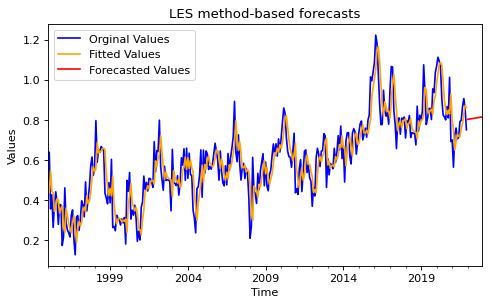

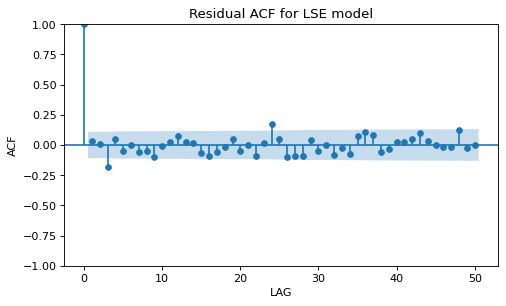

In [19]:
#IMplementing hot linear smoothing 
HotLinearSmoothing(MSTA['Anomaly (deg C)'],12)
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


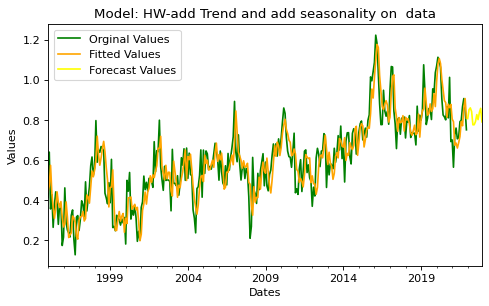

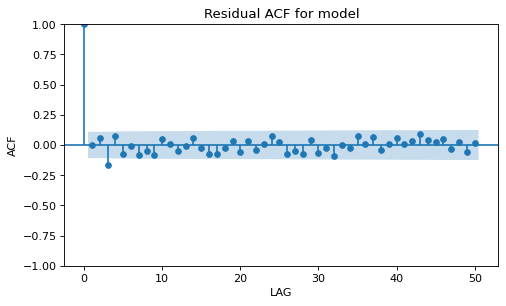

In [20]:
#holtwintermethods for additive seasonalality
holtwintermethods(MSTA['Anomaly (deg C)'],12,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


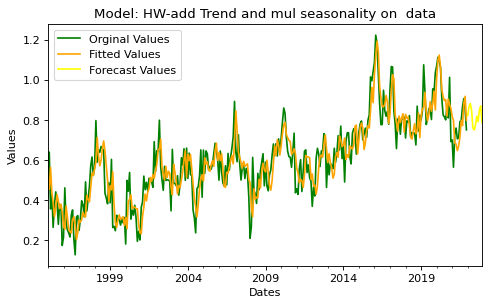

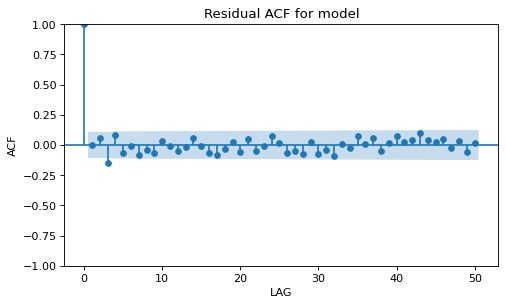

In [21]:
##holtwintermethods for multiplicative seasonalality
holtwintermethods(MSTA['Anomaly (deg C)'],12,'add','mul')
plt.show()

# CH4 IMPLEMENTATION

In [22]:
#Reading data for original and 2*12 MA
CH4=pd.read_excel('CH4.xlsx',sheet_name='CH4')
CH4MA=pd.read_excel('CH4.xlsx',sheet_name='CH4MA')
sorted_CH4 = CH4.sort_values(by=['year','month'], ascending=True)

In [23]:
#DATA PREPARATION
CH4=sorted_CH4[(sorted_CH4['year']>=1984)]
CH4['Time']=pd.to_datetime((CH4['year'].astype('str')+'-'+CH4['month'].astype('str')))
CH4MA['Time']=pd.to_datetime((CH4MA['year'].astype('str')+'-'+CH4MA['month'].astype('str')))

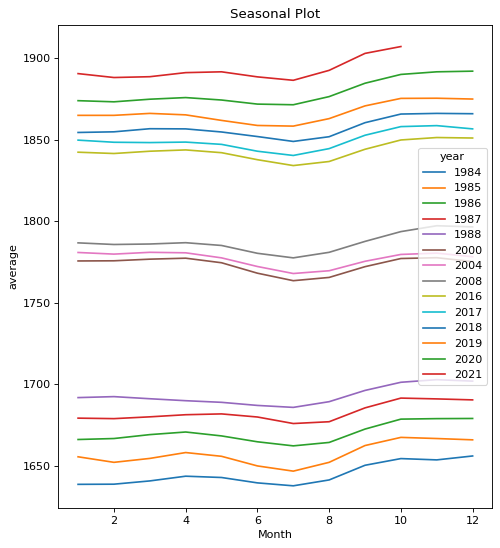

In [24]:
#Seasonal plot for only selected year
seasonal_plot(CH4[CH4.year.isin([1984,1985,1986,1987,1988,2000,2004,2008,20009,2016,2017,2018,2019,2020,2021])],'average','month','year')

No handles with labels found to put in legend.


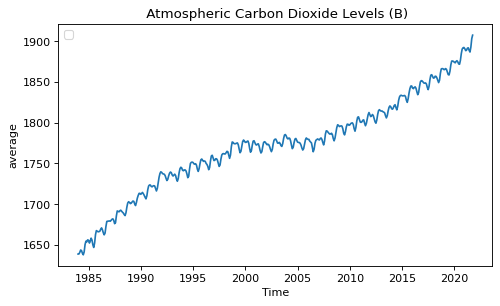

In [25]:
#Plotting original data
ax = plt.axes()
ax.plot(CH4['Time'], CH4['average']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title(" Atmospheric Carbon Dioxide Levels (B)")
plt.xlabel("Time")
plt.ylabel("average")
plt.show()

In [26]:
#Setting index for the selected columns
CH4=CH4[['Time','average']]
CH4MA=CH4MA[['Time','average']]
CH4.set_index('Time',inplace=True)
CH4MA.set_index('Time',inplace=True)

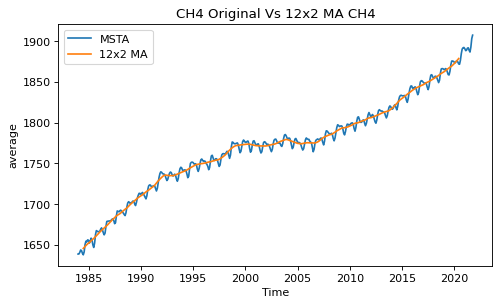

In [27]:
#Plotting graph  for original vs 2*12 MA 
plt.plot(CH4[['average']],label="MSTA")
plt.plot(CH4MA, label = "12x2 MA")
plt.title("CH4 Original Vs 12x2 MA CH4")
plt.legend()
plt.xlabel("Time")
plt.ylabel("average")
plt.show()

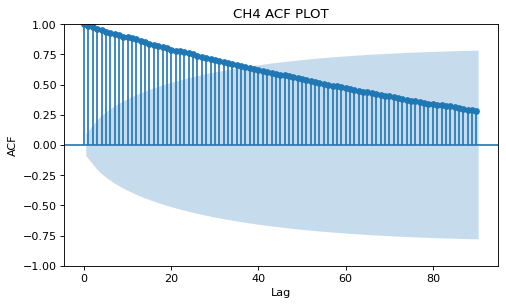

In [28]:
#ACF plot for the data 
Acf_plot(CH4['average'],'CH4 ACF PLOT')

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


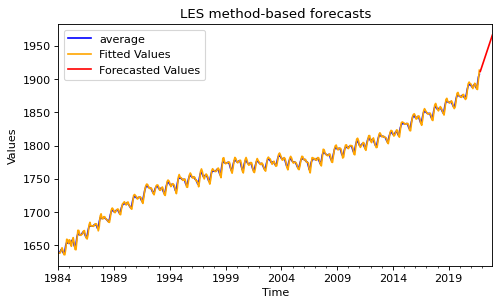

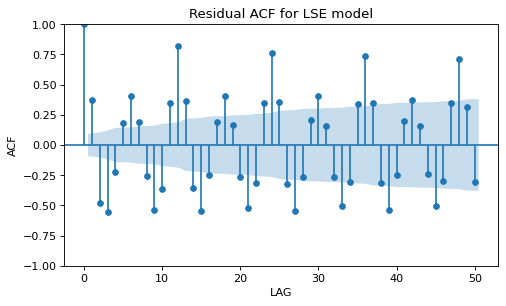

In [29]:
#Hot linear exponential smoothing
HotLinearSmoothing(CH4,14)
plt.show()


c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


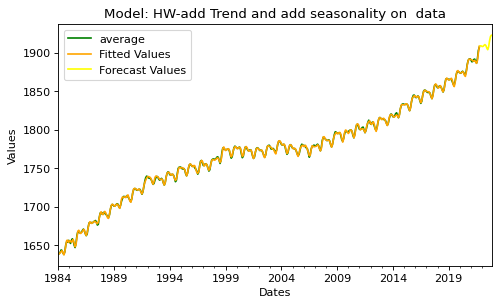

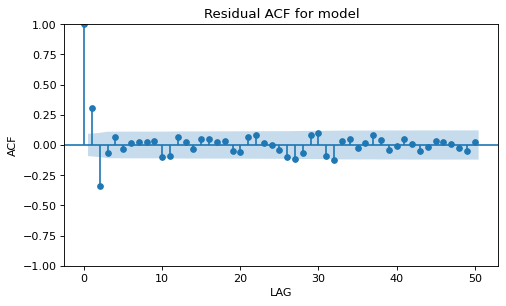

In [30]:
#Holt winter method exponetial smoothing with add trend and add seasonality
holtwintermethods(CH4,14,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


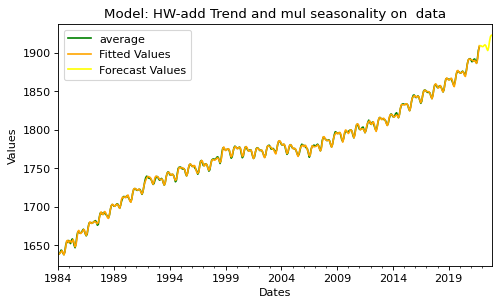

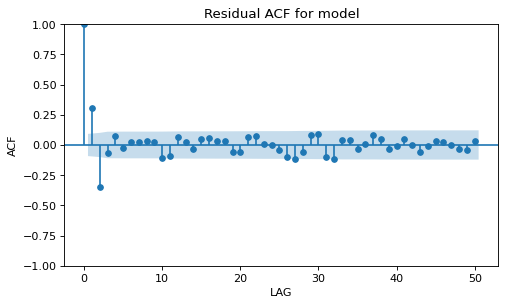

In [31]:
#Holt winter method exponetial smoothing with add trend and seas seasonality
holtwintermethods(CH4,14,'add','mul')
plt.show()

# GMAF  IMPLEMENTATION

In [32]:
#Reading data 
GMAF=pd.read_excel('GMAF.xlsx',sheet_name='GMAF')
GMAF['CDID']=pd.to_datetime(GMAF['CDID'])
GMAF['days_in_month'] = GMAF['CDID'].dt.days_in_month
GMAF['days_in_month']=GMAF['days_in_month'].replace(29, 28)
GMAF['GMAFCALADJUSTED']=(365.25*GMAF['GMAF'])/(12*GMAF['days_in_month']) #DOING CALENDAR ADJUSTMENT 
newgmaf=copy.deepcopy(GMAF) #creating deep copy 
newgmaf['month']=pd.DatetimeIndex(newgmaf['CDID']).month
newgmaf['year']=pd.DatetimeIndex(newgmaf['CDID']).year

In [33]:
#Selecting only few columns
GMAF=GMAF[['CDID','GMAF','GMAFCALADJUSTED']]

In [34]:
#Lograthimic data and Squared data  Transformation
GMAF['LogGmaf']=np.abs(np.log(GMAF['GMAFCALADJUSTED']))
GMAF['SqrtGmaf']=np.abs(np.sqrt(GMAF['GMAFCALADJUSTED']))

No handles with labels found to put in legend.


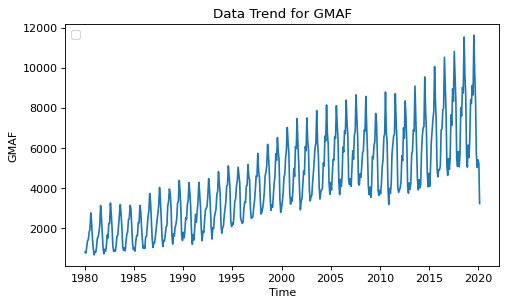

In [35]:
#Plotting for data 
ax = plt.axes()
ax.plot(GMAF['CDID'], GMAF['GMAF']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("Data Trend for GMAF")
plt.xlabel("Time")
plt.ylabel("GMAF")
plt.show()

No handles with labels found to put in legend.


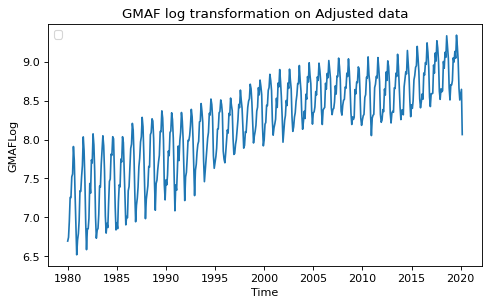

In [36]:
#LOGRATHIMIC PLOT
ax = plt.axes()
ax.plot(GMAF['CDID'], GMAF['LogGmaf']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("GMAF log transformation on Adjusted data")
plt.xlabel("Time")
plt.ylabel("GMAFLog")
plt.show()

Text(0, 0.5, 'GMAFSqrt')

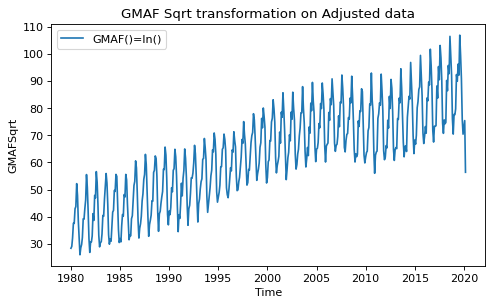

In [37]:
#SQRT PLOT
ax = plt.axes()
ax.plot(GMAF['CDID'], GMAF['SqrtGmaf'],label="GMAF()=ln()") 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("GMAF Sqrt transformation on Adjusted data")
plt.xlabel("Time")
plt.ylabel("GMAFSqrt")

In [38]:
#Set index 
GMAF=GMAF.set_index('CDID')

In [39]:
#2*12MA smoothening data read
GMAFMA=pd.read_excel('GMAF_32521405_33269327_32734417.xlsx',sheet_name='GMAFMA') #2*12MA smoothening
GMAFMA['Dates']=pd.to_datetime(GMAFMA['Dates'])
GMAFMA=GMAFMA.set_index('Dates')

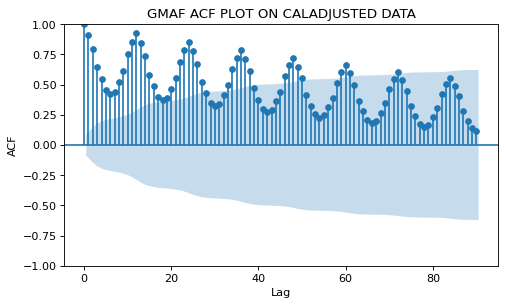

In [40]:
#Autocorrealation Plot
Acf_plot(GMAF['GMAFCALADJUSTED'],'GMAF ACF PLOT ON CALADJUSTED DATA')

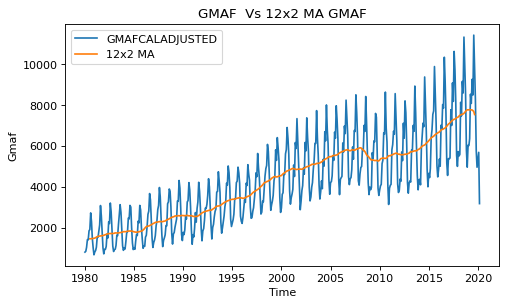

In [41]:
#GMAF vs 2*12 MA 
plt.plot(GMAF['GMAFCALADJUSTED'],label="GMAFCALADJUSTED")
plt.plot(GMAFMA, label = "12x2 MA")
plt.title("GMAF  Vs 12x2 MA GMAF")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Gmaf")
plt.show()

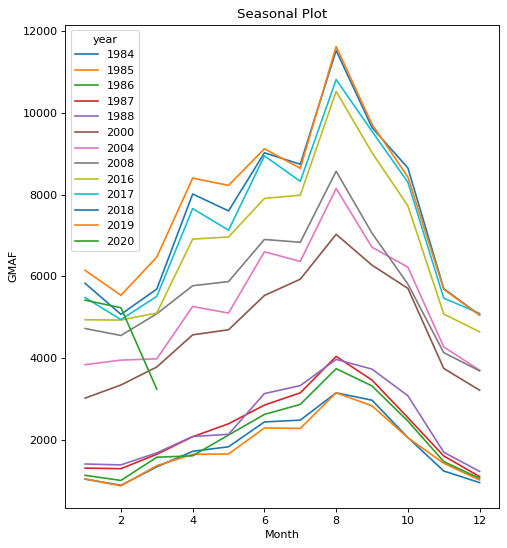

In [42]:
#Seasonal Plot for Gmaf 
seasonal_plot(newgmaf[newgmaf.year.isin([1984,1985,1986,1987,1988,2000,2004,2008,20009,2016,2017,2018,2019,2020])],'GMAF','month','year')


c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


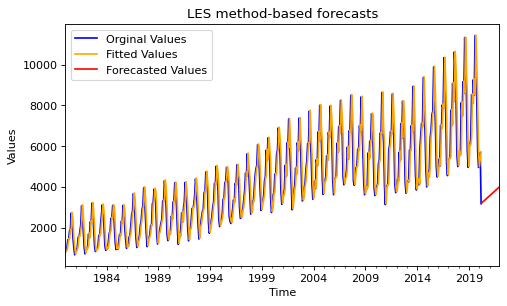

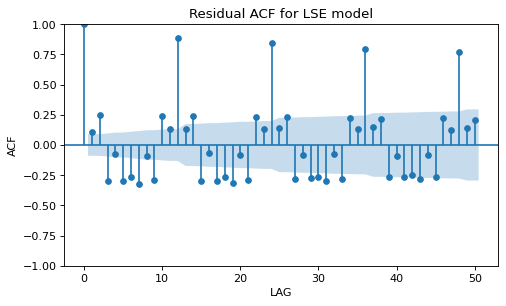

In [43]:
#Linear exponential smoothing
HotLinearSmoothing(GMAF['GMAFCALADJUSTED'],21)
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


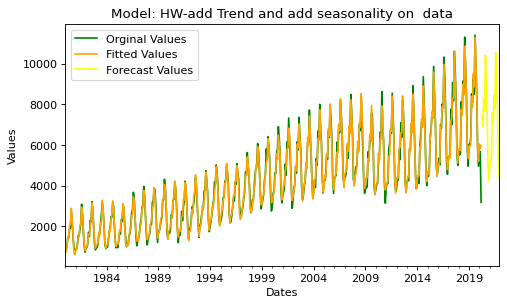

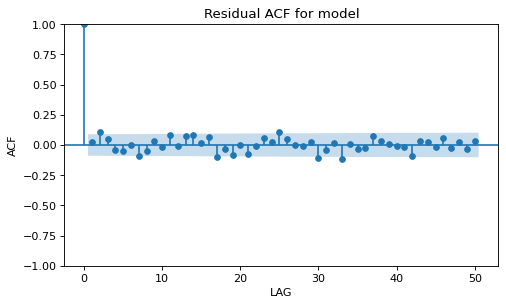

In [44]:
#Holt winter  with add seasonalality
holtwintermethods(GMAF['GMAFCALADJUSTED'].squeeze(axis=0),21,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


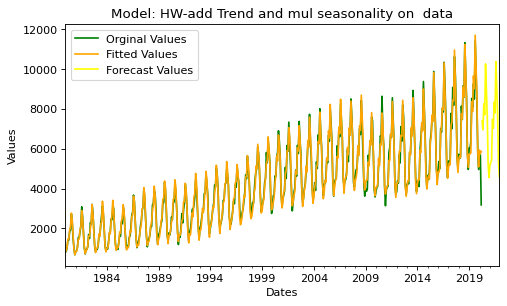

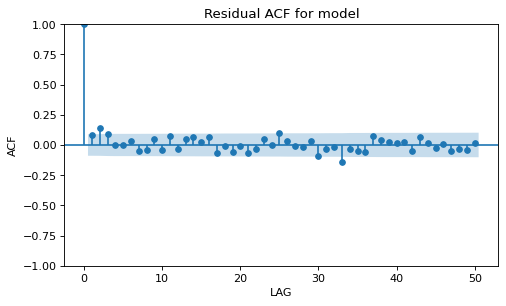

In [45]:
#Holt winter with mul seasonalality
holtwintermethods(GMAF['GMAFCALADJUSTED'].squeeze(axis=0),21,'add','mul')
plt.show()

###### FOR LOGRATHIMIC TRANSFORMATION

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


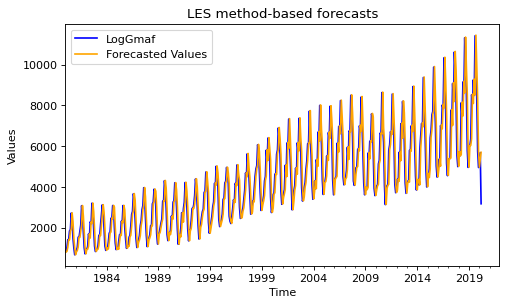

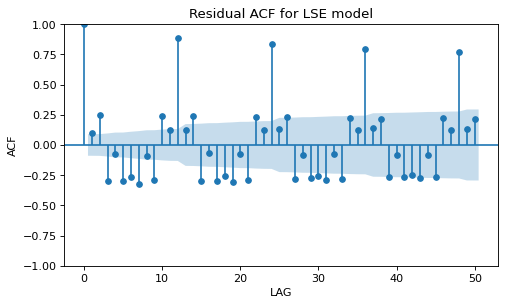

In [46]:
HotLinearLOGSmoothing(GMAF[['LogGmaf']],21)
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


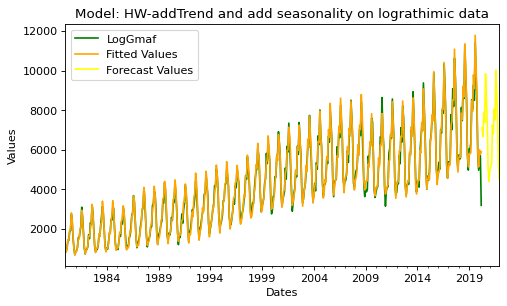

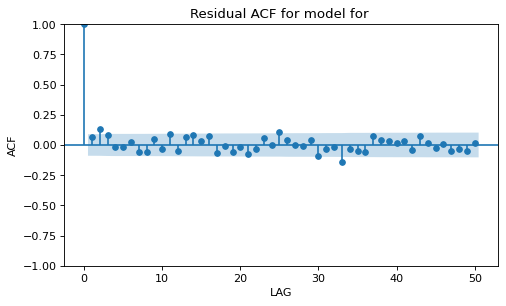

In [47]:
holtwintermethodsLograthimic(GMAF[['LogGmaf']],21,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


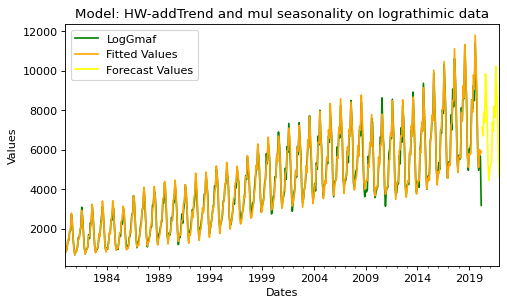

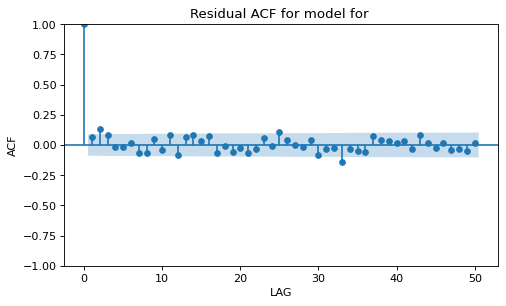

In [48]:
holtwintermethodsLograthimic(GMAF[['LogGmaf']],21,'add','mul')
plt.show()

##### FOR SQUARE TRANSFORMATION

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


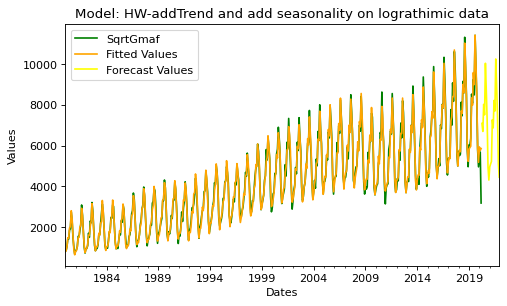

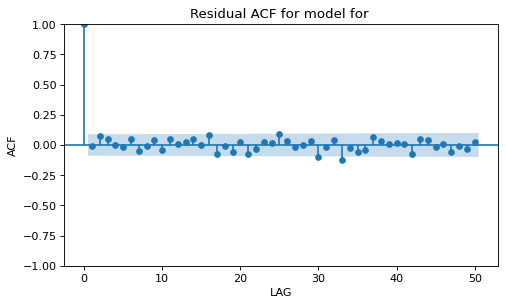

In [49]:
holtwintermethodssquare(GMAF[['SqrtGmaf']],21,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


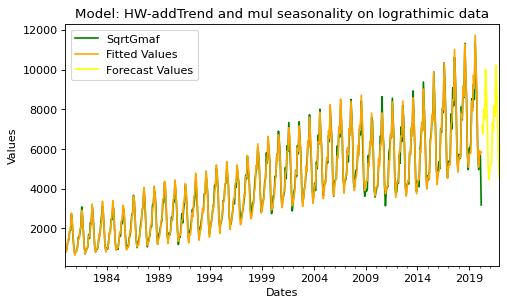

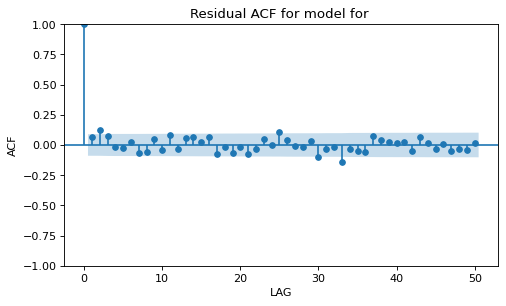

In [50]:
holtwintermethodssquare(GMAF[['SqrtGmaf']],21,'add','mul')
plt.show()

# ET12 IMPLEMENTATION

In [51]:
#Reading data 
ET12=pd.read_excel('ET12.xlsx',sheet_name="ET12")
ET12['Date']=pd.to_datetime(ET12['Month'])
ET12['days_in_month'] = ET12['Date'].dt.days_in_month
ET12['Unadjusted_total']=(365.25*ET12['Unadjusted_total'])/(12*ET12['days_in_month'])
ET12=ET12[['Date','Unadjusted_total']]

No handles with labels found to put in legend.


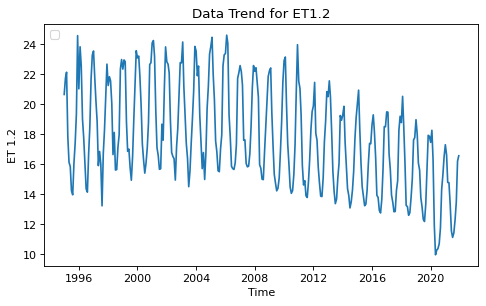

In [52]:
#Plotting original data 
ax = plt.axes()
ax.plot(ET12['Date'], ET12['Unadjusted_total']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("Data Trend for ET1.2")
plt.xlabel("Time")
plt.ylabel("ET 1.2")
plt.show()

In [53]:
#Doing Calendar adjustment 
ET12['days_in_month'] = ET12['Date'].dt.days_in_month
ET12['days_in_month']=ET12['days_in_month'].replace(29, 28) #this done to because in cal adjustment we are using 365.25
ET12['Cal_adjusted_total']=(365.25*ET12['Unadjusted_total'])/(12*ET12['days_in_month'])


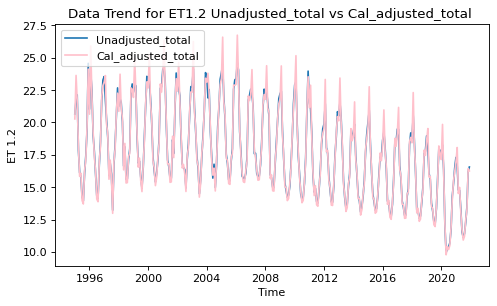

In [54]:
#Data Trend for ET1.2 Unadjusted_total vs Cal_adjusted_total
ax = plt.axes()
ax.plot(ET12['Date'], ET12['Unadjusted_total'],label='Unadjusted_total')
ax.plot(ET12['Date'], ET12['Cal_adjusted_total'],label='Cal_adjusted_total',color='pink')
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("Data Trend for ET1.2 Unadjusted_total vs Cal_adjusted_total ")
plt.xlabel("Time")
plt.ylabel("ET 1.2")
plt.show()

In [55]:
#Logaeithmic and Square Transformation
ET12['LogET1.2']=np.abs(np.log(ET12['Cal_adjusted_total']))
ET12['SqrtET12']=np.abs(np.sqrt(ET12['Cal_adjusted_total']))

No handles with labels found to put in legend.


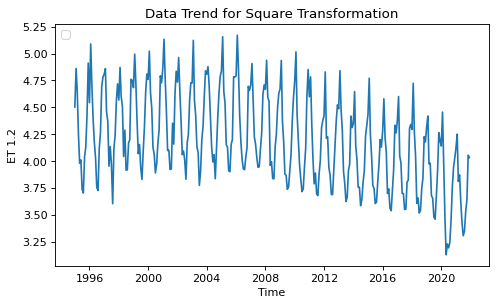

In [56]:
#PLOT for square data
ax = plt.axes()
ax.plot(ET12['Date'], ET12['SqrtET12']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("Data Trend for Square Transformation")
plt.xlabel("Time")
plt.ylabel("ET 1.2")
plt.show()

No handles with labels found to put in legend.


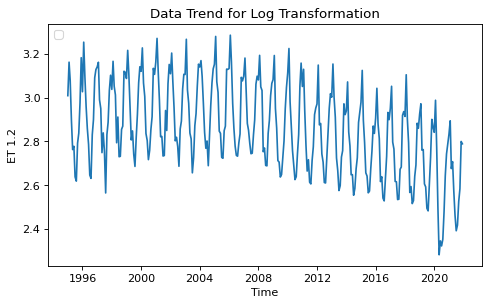

In [57]:
#PLOT for Log data
ax = plt.axes()
ax.plot(ET12['Date'], ET12['LogET1.2']) 
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
plt.legend(loc="upper left")
plt.title("Data Trend for Log Transformation")
plt.xlabel("Time")
plt.ylabel("ET 1.2")
plt.show()

In [58]:
#Creating date  column copy 
ET12['DateCopy']=ET12['Date']
ET12=ET12.set_index('Date')

In [59]:
#Reading data for 2*12MA smoothening
ET12MA=pd.read_excel('ET12_32521405_33269327_32734417.xlsx',sheet_name='ET12MA') #2*12MA smoothening
ET12MA['Dates']=pd.to_datetime(ET12MA['Month'])
ET12MA['days_in_month'] = ET12MA['Dates'].dt.days_in_month
ET12MA['days_in_month']=ET12MA['days_in_month'].replace(29, 28)
ET12MA['Cal_adjusted_total']=(365.25*ET12MA['Unadjusted_total'])/(12*ET12MA['days_in_month'])
ET12MA=ET12MA.set_index('Dates')

In [60]:
#selected column
ET12MA=ET12MA[['Cal_adjusted_total']]

Text(0, 0.5, 'ET 1.2')

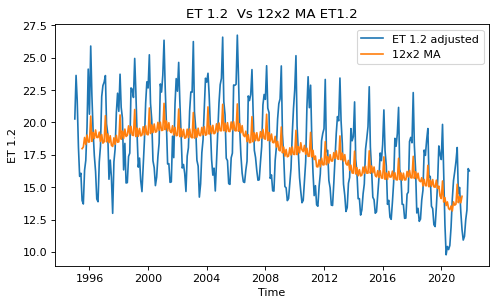

In [61]:
#plotting ET 1.2  Vs 12x2 MA ET1.2
plt.plot(ET12['Cal_adjusted_total'],label="ET 1.2 adjusted")
plt.plot(ET12MA, label = "12x2 MA")
plt.title("ET 1.2  Vs 12x2 MA ET1.2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("ET 1.2")

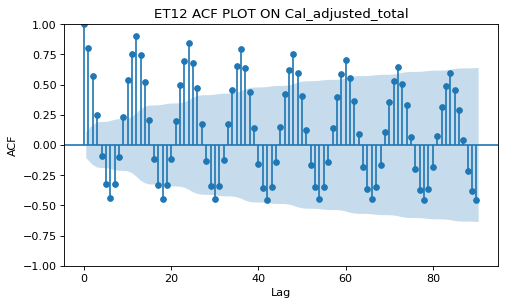

In [62]:
#Autocorrealation plot for the data 
Acf_plot(ET12['Cal_adjusted_total'],'ET12 ACF PLOT ON Cal_adjusted_total')


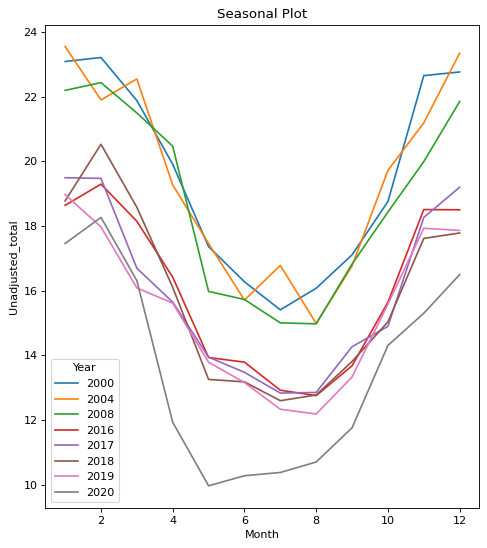

In [63]:
#Seasonal Plot 
ET12['Month'] = pd.DatetimeIndex(ET12['DateCopy']).month
ET12['Year'] = pd.DatetimeIndex(ET12['DateCopy']).year
seasonal_plot(ET12[ET12.Year.isin([2000,2004,2008,20009,2016,2017,2018,2019,2020])],'Unadjusted_total','Month','Year')


c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


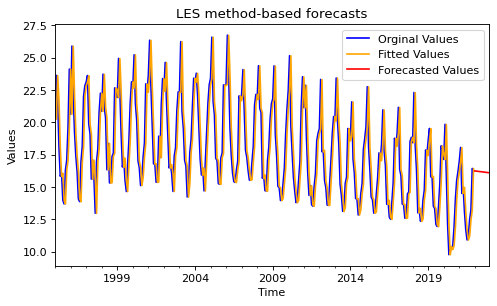

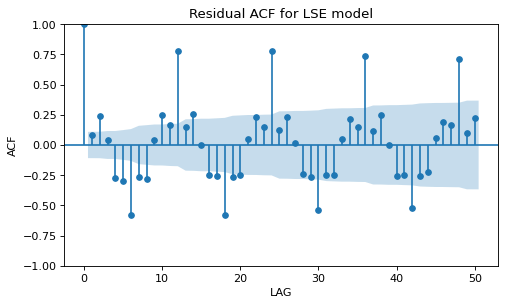

In [64]:
#FORECASTING for original data 
HotLinearSmoothing(ET12['Cal_adjusted_total'],12)
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


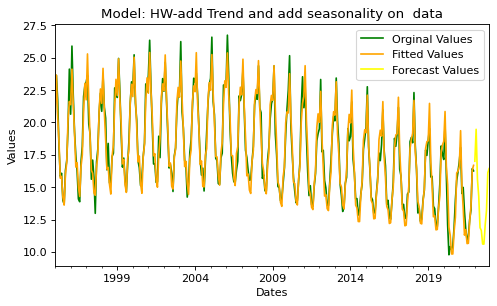

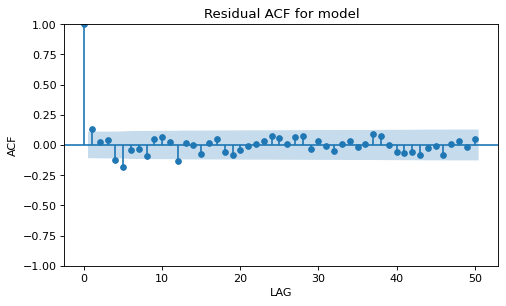

In [65]:
#HWA 
holtwintermethods(ET12['Cal_adjusted_total'],12,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


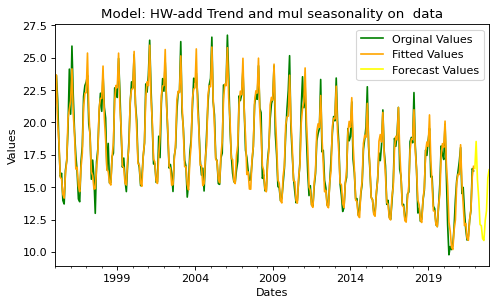

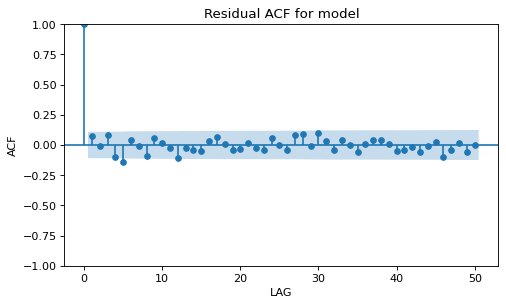

In [66]:
#HWM
holtwintermethods(ET12['Cal_adjusted_total'],12,'add','mul')
plt.show()

#### FORECASTING for Lograthimic  data Transformation

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


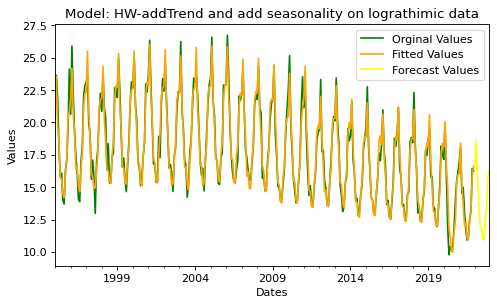

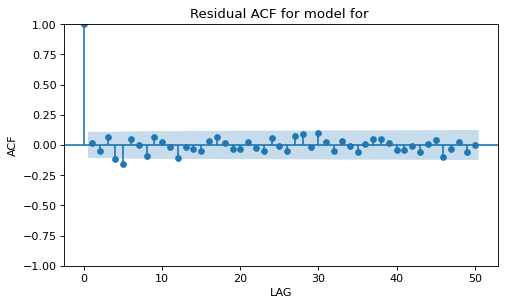

In [67]:
#HWA
holtwintermethodsLograthimic(ET12['LogET1.2'],12,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


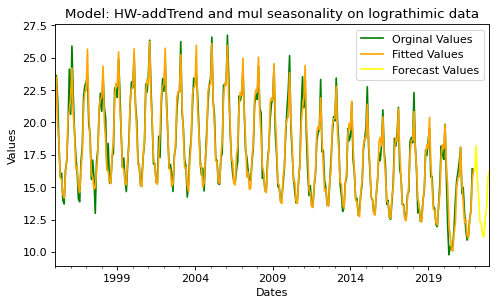

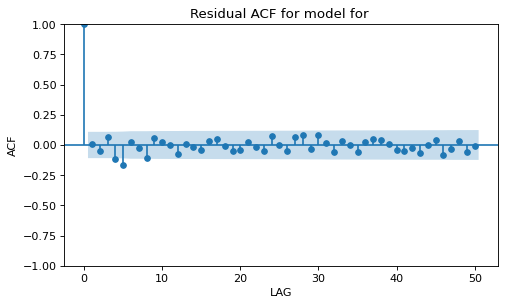

In [68]:
#HWM
holtwintermethodsLograthimic(ET12['LogET1.2'],12,'add','mul')
plt.show()

#### FORECASTING for Square  data Transformation

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


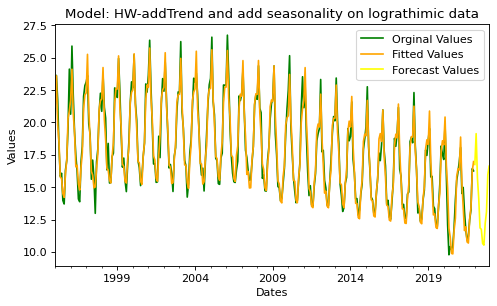

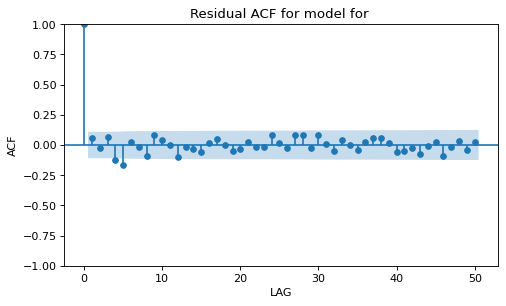

In [69]:
#HWA
holtwintermethodssquare(ET12['SqrtET12'],12,'add','add')
plt.show()

c:\users\aakas\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


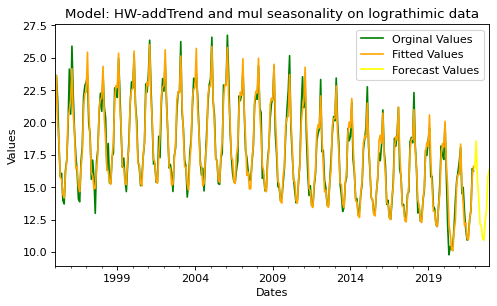

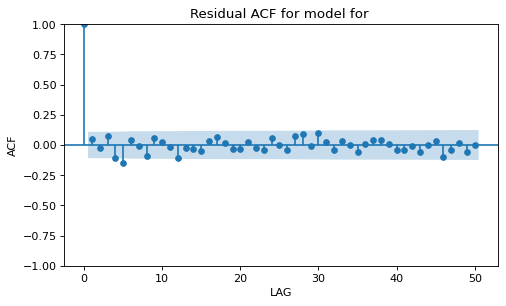

In [70]:
#HWM
holtwintermethodssquare(ET12['SqrtET12'],12,'add','mul')
plt.show()